In [ ]:
# utilizado para manejos de directorios y rutas
import os
# Computacion vectorial y cientifica para python
import numpy as np
from numpy import genfromtxt

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
# Leer datos separados por una coma
data = genfromtxt('/content/drive/MyDrive/IA/dataset/Diamonds Prices2022.1.csv',delimiter=',')
X = data[:, :9]
X = np.delete(X, 0, axis=0)
X  = np.delete(X , 2, axis=1)
X  = np.delete(X , 3, axis=1)
X  = np.delete(X , 6, axis=1)
X  = np.delete(X , 5, axis=1)
X  = np.delete(X , 4, axis=1)
X  = np.delete(X , 2, axis=1)
X  = np.delete(X , 1, axis=1)

y = data[:, 7]
y = np.delete(y, 0, axis=0)
m = y.size

m = y.size  # m = numero de ejemplos de entrenamiento
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
  print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1],  y[i]))

53943
  X[:,0] X[:, 1]         y
--------------------------
       1      62       326
       2      60       326
       3      57       327
       4      62       334
       5      63       335
       6      63       336
       7      62       336
       8      62       337
       9      65       337
      10      59       338


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados

X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.0000e+00 6.1500e+01]
 [2.0000e+00 5.9800e+01]
 [3.0000e+00 5.6900e+01]
 ...
 [5.3941e+04 6.0500e+01]
 [5.3942e+04 5.9800e+01]
 [5.3943e+04 6.0500e+01]]
Media calculada: [26972.            61.74932243]
Desviación estandar calculada: [1.55720028e+04 1.43261299e+00]
[[-1.7320187  -0.17403335]
 [-1.73195448 -1.36067623]
 [-1.73189026 -3.38494937]
 ...
 [ 1.73189026 -0.87205857]
 [ 1.73195448 -1.36067623]
 [ 1.7320187  -0.87205857]]


In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -1.7320187  -0.17403335]
 [ 1.         -1.73195448 -1.36067623]
 [ 1.         -1.73189026 -3.38494937]
 ...
 [ 1.          1.73189026 -0.87205857]
 [ 1.          1.73195448 -1.36067623]
 [ 1.          1.7320187  -0.87205857]]


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 3860.84776548 -1204.3225368    -80.51295039]
El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): Z:209854


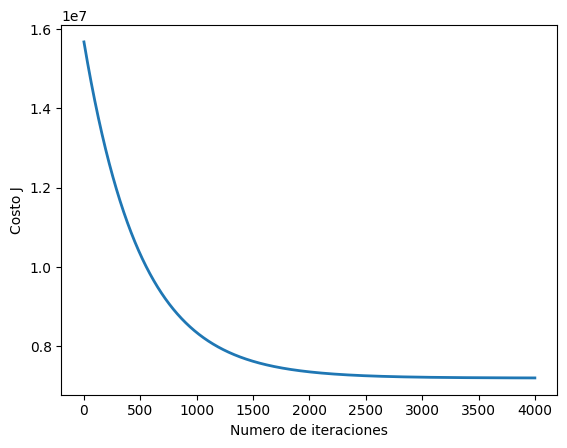

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 40000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [53,62,5.74]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

In [ ]:
X_array = [53,62,5.74]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [ ]:
price = np.dot(X_array, theta)

print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $209854


In [ ]:
data = genfromtxt('/content/drive/MyDrive/IA/dataset/Diamonds Prices2022.1.csv',delimiter=',')
X = data[:, :9]
X = np.delete(X, 0, axis=0)
X  = np.delete(X , 2, axis=1)
X  = np.delete(X , 3, axis=1)
X  = np.delete(X , 6, axis=1)
X  = np.delete(X , 5, axis=1)
X  = np.delete(X , 4, axis=1)
X  = np.delete(X , 2, axis=1)
X  = np.delete(X , 1, axis=1)

y = data[:, 7]
y = np.delete(y, 0, axis=0)
m = y.size

m = y.size  # m = numero de ejemplos de entrenamiento
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

53943


In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    theta = theta[:-1]

    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [54,654,1]
X_array[1:3] = (X_array[1:3] - mu) / sigma

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 9.73199048e+03 -7.88075931e-02]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $209854


In [5]:
%cd '/content/drive/MyDrive/IA'
!ls
!git config --glbal user.emal ""
!git add README.md
!git commit -m "primer compromiso"
!git rama -M principal
!git remoto agregar origen https://github.com/juanjos12/IA.git
!git push - u origen principal

/content/drive/MyDrive/IA
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/IA/.git/
fatal: pathspec 'README.md' did not match any files
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@823f94bddf86.(none)')
git: 'rama' is not a git command. 